### Classification 
#### Binary: 2 Variables (Yes or No; 0 or 1, etc.)
#### Multiclass: More than 2 values such as positive, negative, and neutral thus having 3 classes 
####             or a variable having values as A, B, C, and D, thus having 4 classes
####             

In [1]:
#### Logistic is for binary classification
### Rest of algorightm can be applied for both binary and multiclass
### SVM 
### Decision Tree
### RF

In [2]:
### Logitic Regression is used for binary classification problem where it will try to predict 
### the probabilities of a particular class. The probability is always going to be between 0 and 1. 
### For example, if I flip a coin, there is 50% chance the probabilty of getting head.  
### Similalry, if I roll a dice then there is a 1/6 (16.67%) chance that I will get six. 

In [3]:
### Sigmoid function - It will try to map independent variables (quashing function) y=1/(1+ e^-x)
### x = Beta0+ Beta1*x1 + Beta2*x2 + Beta3*x3...
### The value will always be between 0 and 1

### Accuracy Score
### Confusion Metrics
### Precision 
### Recall
### F1 Score
### Receiver Operating Curve
### AUC score


In [4]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Checking for 
df = pd.read_csv('pima-indians-diabetes.csv')
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome']=df['Outcome'].astype('category')

In [7]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [8]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [9]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
#oh=OneHotEncoder(cateory=X)

#dcat_df= oh.fit_transform(df[['Pregnancies']])

In [11]:
cat_df = pd.get_dummies(df['Outcome'])

In [12]:
cat_df

,0,1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [13]:
cat_df = cat_df.rename(columns={0:'NotDiabetic', 1:'Diabetic'})

In [14]:
cat_df

,NotDiabetic,Diabetic
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [15]:
pd.get_dummies(data=df, columns=['Outcome'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,0
764,2,122,70,27,0,36.8,0.340,27,1,0
765,5,121,72,23,112,26.2,0.245,30,1,0
766,1,126,60,0,0,30.1,0.349,47,0,1


In [16]:
df_new = pd.get_dummies(data=df, columns=['Outcome'])

In [17]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1


In [18]:
X = df.drop('Outcome', axis=1)
y= df['Outcome']

In [19]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
# Using LogisticRegression method here
from sklearn.model_selection import train_test_split
##  By using df.drop you can assign all columns in the datafield except the column label specified i.e. Outcome
X = df.drop('Outcome', axis=1)
## y is here the Outcome column values
y= df['Outcome']
## Now Split arrays into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
## Specify regression model i.e. in this case LogisticRegression but you can also use LinearRegression
from sklearn.linear_model import LogisticRegression
## LogisticRegression() is being renamed as lr (short form)
lr = LogisticRegression()
## Now you are telling machine to learn on the train data
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
pred=lr.predict(X_test)

In [22]:
y_test[:10]

173    0
253    0
207    1
737    0
191    0
754    1
159    1
448    1
359    1
651    0
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [23]:
pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [24]:
# Precision = True Positive / (True Positive + False Positive)
# Out of total predictive positive, how many of them are actually positive

## Recall = True Positive/(True Positive + False Negative)

## All = (True Positive + True Negative)/(True Positive + False Positive + True Negative + False Negative)

## In Real Life, you will face the class imbalance issue. 

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(y_test, pred)

0.7586206896551724

In [27]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [28]:
confusion_matrix(y_test, pred)

array([[65, 10],
       [18, 23]])

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        75
           1       0.70      0.56      0.62        41

    accuracy                           0.76       116
   macro avg       0.74      0.71      0.72       116
weighted avg       0.75      0.76      0.75       116



In [39]:
## Using LogisticRegression method here
## 1. By using df.drop you can assign all columns in the datafield except the column label specified i.e. Outcome
## 2. y is here the Outcome column values
## 3. Now Split data arrays into train and test data so that you can train machine on the "train data"
## 4. Specify regression model i.e. in this case LogisticRegression but you can also use LinearRegression
## 5. LogisticRegression() is being renamed as lr (short form)
## 6. Now you are telling machine to learn on the train data
## 7. Now you are using lr.predict method to predict
## 8. Finally you can use the two statements y_test[:10] and pred[:10] or something like this to see how accurately
##    the machine has predicted 
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y= df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [40]:
pred=lr.predict(X_test)

In [41]:
confusion_matrix(y_test, pred)

array([[65, 10],
       [18, 23]])

In [42]:
y_prob = lr.predict_proba(X_test)

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

In [55]:
import matplotlib.pyplot as plt

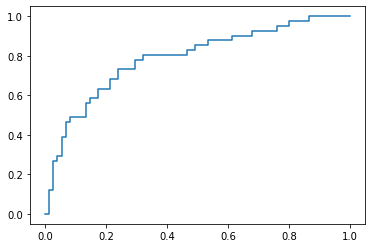

In [56]:
plt.plot(fpr,tpr)

In [52]:
## Optional thresholds
opt=np.sqrt(tpr*(1-fpr))
ind=np.argmax(opt)
print(thresholds[ind])

0.34574794681860177


In [57]:
predss = np.where(y_prob[:, 1]>0.345, 1, 0)

In [58]:
predss

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0])

In [59]:
confusion_matrix(y_test, predss)

array([[57, 18],
       [11, 30]])

In [60]:
confusion_matrix(y_test, pred)

array([[65, 10],
       [18, 23]])

In [72]:
# Checking for 
df1 = pd.read_csv('titanic_train.csv')
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,<bound method NDFrame,1,0,523,7.2500,147,2
1,2,1,1,190,0,<bound method NDFrame,1,0,596,71.2833,81,0
2,3,1,3,353,0,<bound method NDFrame,0,0,669,7.9250,147,2
3,4,1,1,272,0,<bound method NDFrame,1,0,49,53.1000,55,2
4,5,0,3,15,1,<bound method NDFrame,0,0,472,8.0500,147,2


In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Name']=le.fit_transform(df1['Name'])
df1['Sex']=le.fit_transform(df1['Sex'])
df1['Ticket']=le.fit_transform(df1['Ticket'])
df1['Cabin']=le.fit_transform(df1['Cabin'])
df1['Embarked']=le.fit_transform(df1['Embarked'])

In [102]:
df1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,548,1,<bound method NDFrame,0,0,101,13.00,147,2
887,888,1,1,303,0,<bound method NDFrame,0,0,14,30.00,30,2
888,889,0,3,413,0,<bound method NDFrame,1,2,675,23.45,147,2
889,890,1,1,81,1,<bound method NDFrame,0,0,8,30.00,60,0
890,891,0,3,220,1,<bound method NDFrame,0,0,466,7.75,147,1


In [80]:
df1['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [87]:
df1['Age']=df1['Age'].apply(lambda x:str(x).split('.', 1)[0])

In [96]:
from sklearn.model_selection import train_test_split
X = df1.drop('Survived', axis=1)
y= df1['Survived']
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,<bound method NDFrame,1,0,523,7.2500,147,2
1,2,1,1,190,0,<bound method NDFrame,1,0,596,71.2833,81,0
2,3,1,3,353,0,<bound method NDFrame,0,0,669,7.9250,147,2
3,4,1,1,272,0,<bound method NDFrame,1,0,49,53.1000,55,2
4,5,0,3,15,1,<bound method NDFrame,0,0,472,8.0500,147,2


In [97]:
df1['Age'].unique()

array(['<bound method NDFrame'], dtype=object)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [94]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: '<bound method NDFrame'